## Dependencies
```
pip install deepsmiles selfies safe-mol rdkit 
```

In [37]:
# define a molecule and represent it using a SMILES string, DeepSMILES string, 
# and a SELFIES string and a Safe string

from numpy import string_
from rdkit import Chem
import deepsmiles
import selfies
import safe

from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def plot_3d(name, smiles, show=False):
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate 3D coordinates
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())
    AllChem.UFFOptimizeMolecule(molecule)

    # Generate 3D conformer as a PDB string
    pdb_block = Chem.MolToPDBBlock(molecule)

    # Visualize the molecule using py3Dmol
    viewer = py3Dmol.view(width=800, height=600)
    viewer.addModel(pdb_block, 'pdb')
    viewer.setStyle({'stick': {}})
    viewer.zoomTo()
    if show:
        viewer.show()

    # Save the viewer's contents to an HTML file
    html_content = viewer._make_html()
    with open(f'{name}_3d.html', 'w') as f:
        f.write(html_content)


# define caffeine
name_to_input = {
    "Caffeine": "Cn1cnc2c1c(=O)n(C)c(=O)n2C",
    "Aspirin": "CC(=O)OC1=CC=CC=C1C(=O)O",
    "Paracetamol": "CC(=O)NC1=CC=C(C=C1)O",
}
for name in name_to_input:
    input_smiles = name_to_input[name]

    mol = Chem.MolFromSmiles(input_smiles)
    string_reps = {}
    string_reps["SMILES"] = Chem.MolToSmiles(mol)
    string_reps["DeepSMILES"] = deepsmiles.Converter(rings=True, branches=True).encode(string_reps["SMILES"])
    string_reps["SELFIES"] = selfies.encoder(string_reps["SMILES"])
    try:
        string_reps["SAFE"] = safe.encode(input_smiles)
    except:
        pass

    string_reps

    with open(f"{name}.txt", "w") as f:
        for key in string_reps:
            print(f"{key}: {string_reps[key]}", file=f)
        
    # Generate the SVG representation
    from rdkit.Chem import Draw
    drawer = Draw.rdMolDraw2D.MolDraw2DSVG(300, 300)  # Set the size of the image
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()

    # Get the SVG string
    svg = drawer.GetDrawingText()

    with open(f"{name}.svg", "w") as f:
        f.write(svg)
        
    plot_3d(name, input_smiles)

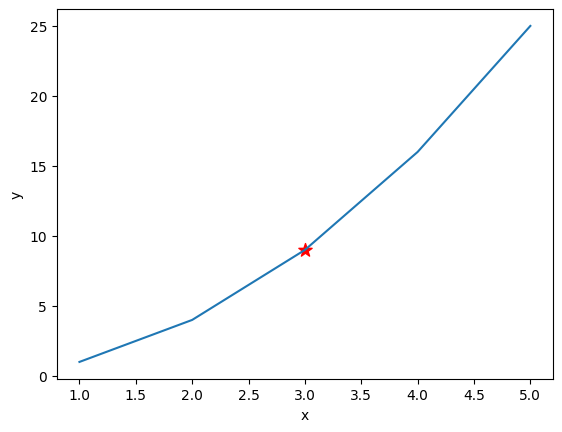

In [31]:
def plot_3d(name, smiles, show=False):
    molecule = Chem.MolFromSmiles(smiles)

    # Add hydrogens to the molecule
    molecule = Chem.AddHs(molecule)

    # Generate 3D coordinates
    AllChem.EmbedMolecule(molecule, AllChem.ETKDG())
    AllChem.UFFOptimizeMolecule(molecule)

    # Generate 3D conformer as a PDB string
    pdb_block = Chem.MolToPDBBlock(molecule)

    # Visualize the molecule using py3Dmol
    viewer = py3Dmol.view(width=800, height=600)
    viewer.addModel(pdb_block, 'pdb')
    viewer.setStyle({'stick': {}})
    viewer.zoomTo()
    if show:
        viewer.show()

    # Save the viewer's contents to an HTML file
    html_content = viewer._make_html()
    with open(f'{name}_3d.html', 'w') as f:
        f.write(html_content)

    print("3D molecule visualization saved as 'molecule_3d.html'");

plot_3d("Caffeine", "CC(Cc1ccc(cc1)C(C(=O)O)C)C", show=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3D molecule visualization saved as 'molecule_3d.html'
